### Membuat Peta Sederhana dengan GeoPandas

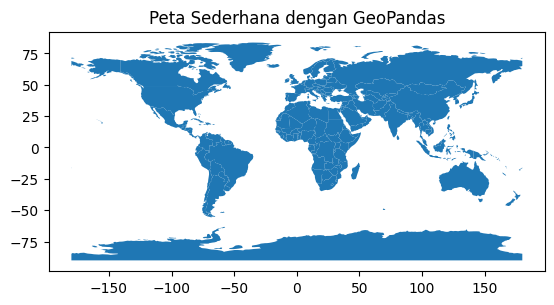

In [3]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Membaca file shapefile
gdf = gpd.read_file("./data example/ne_110m_admin_0_countries")

# Membuat peta dasar
gdf.plot()
plt.title("Peta Sederhana dengan GeoPandas")
plt.show()

### Menambahkan Elemen Peta Menggunakan Matplotlib

In [20]:
# menghitung area disetiap negara
gdf = gdf.to_crs(epsg=3857)
gdf['area'] = gdf.geometry.area
gdf.head()

,featurecla,scalerank,LABELRANK,SOVEREIGNT,SOV_A3,ADM0_DIF,LEVEL,TYPE,TLC,ADMIN,...,FCLASS_ID,FCLASS_PL,FCLASS_GR,FCLASS_IT,FCLASS_NL,FCLASS_SE,FCLASS_BD,FCLASS_UA,geometry,area
159,Admin-0 country,1,4,Antarctica,ATA,0,2,Indeterminate,1,Antarctica,...,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((-5416874.996 -14393907.644, -5...",9.204514e+15
18,Admin-0 country,1,2,Russia,RUS,0,2,Sovereign country,1,Russia,...,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((19895609.388 11436139.118, 200...",8.304514e+13
3,Admin-0 country,1,2,Canada,CAN,0,2,Sovereign country,1,Canada,...,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((-13674486.249 6274861.394, -13...",5.216648e+13
22,Admin-0 country,1,3,Denmark,DN1,1,2,Country,1,Greenland,...,None,None,None,None,None,None,None,None,"POLYGON ((-5205721.29 17490757.185, -4831982.7...",3.628550e+13
4,Admin-0 country,1,2,United States of America,US1,1,2,Country,1,United States of America,...,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((-13674486.249 6274861.394, -13...",2.186228e+13


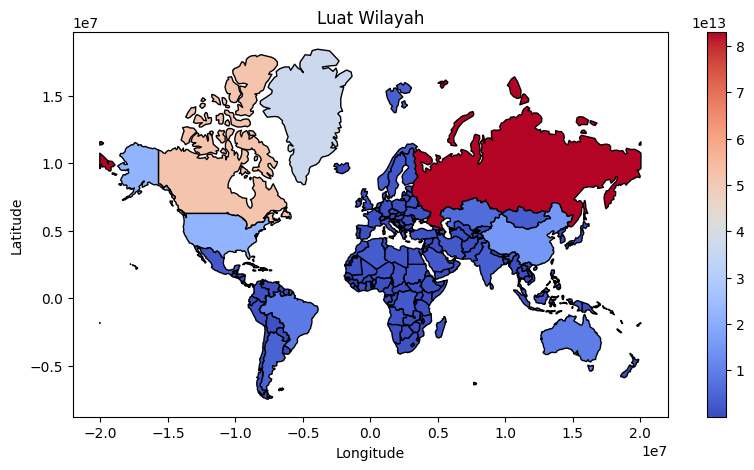

In [33]:
# Mengeluarkan Antartica dari data
gdf = gdf[gdf['SOVEREIGNT'] != 'Antarctica']
# Membuat peta dengan warna berdasarkan atribut tertentu
# area diambil dari column 'area' yang sudah didefinisikan diatas
ax = gdf.plot(column='area', cmap='coolwarm', legend=True, edgecolor='black', figsize=(10, 5))

# Menambahkan judul dan label
plt.title("Luat Wilayah")
plt.xlabel("Longitude")
plt.ylabel("Latitude")

# Menampilkan peta
plt.show()

### Menambahkan Layer ke Peta

In [34]:
# membaca layer peta yang lain (ke-2)
populated = gpd.read_file('./data example/ne_110m_populated_places')
populated = populated.to_crs(epsg=3857)
populated.head()

,SCALERANK,NATSCALE,LABELRANK,FEATURECLA,NAME,NAMEPAR,NAMEALT,NAMEASCII,ADM0CAP,CAPIN,...,FCLASS_ID,FCLASS_PL,FCLASS_GR,FCLASS_IT,FCLASS_NL,FCLASS_SE,FCLASS_BD,FCLASS_UA,FCLASS_TLC,geometry
0,8,10,3,Admin-0 capital,Vatican City,None,None,Vatican City,1,None,...,None,None,None,None,None,None,None,None,None,POINT (1386304.644 5146502.579)
1,7,20,0,Admin-0 capital,San Marino,None,None,San Marino,1,None,...,None,None,None,None,None,None,None,None,None,POINT (1385011.523 5455558.181)
2,7,20,0,Admin-0 capital,Vaduz,None,None,Vaduz,1,None,...,None,None,None,None,None,None,None,None,None,POINT (1059390.803 5963928.58)
3,6,30,8,Admin-0 capital alt,Lobamba,None,None,Lobamba,0,Legislative and,...,None,None,None,None,None,None,None,None,None,POINT (3473167.79 -3056995.462)
4,6,30,8,Admin-0 capital,Luxembourg,None,None,Luxembourg,1,None,...,None,None,None,None,None,None,None,None,None,POINT (682388.79 6379291.919)


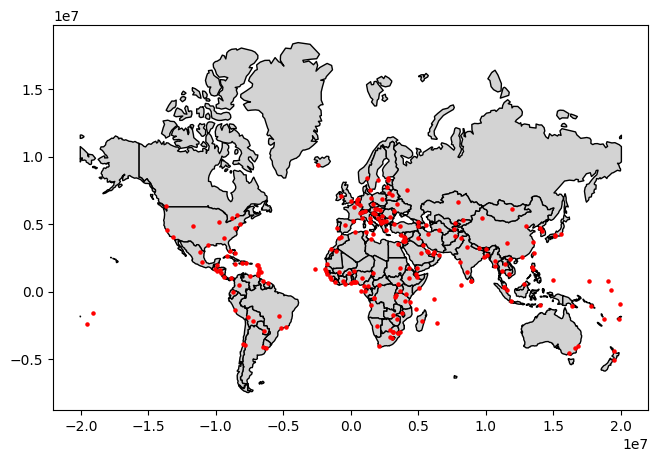

In [35]:
# Membuat peta dasar wilayah
ax = gdf.plot(color='lightgrey', edgecolor='black', figsize=(10, 5))

# Plot Ibu Kota
populated.plot(ax=ax, color='red', markersize=5)

# tampilkan peta
plt.show()

### Visualisasi Peta Choropleth

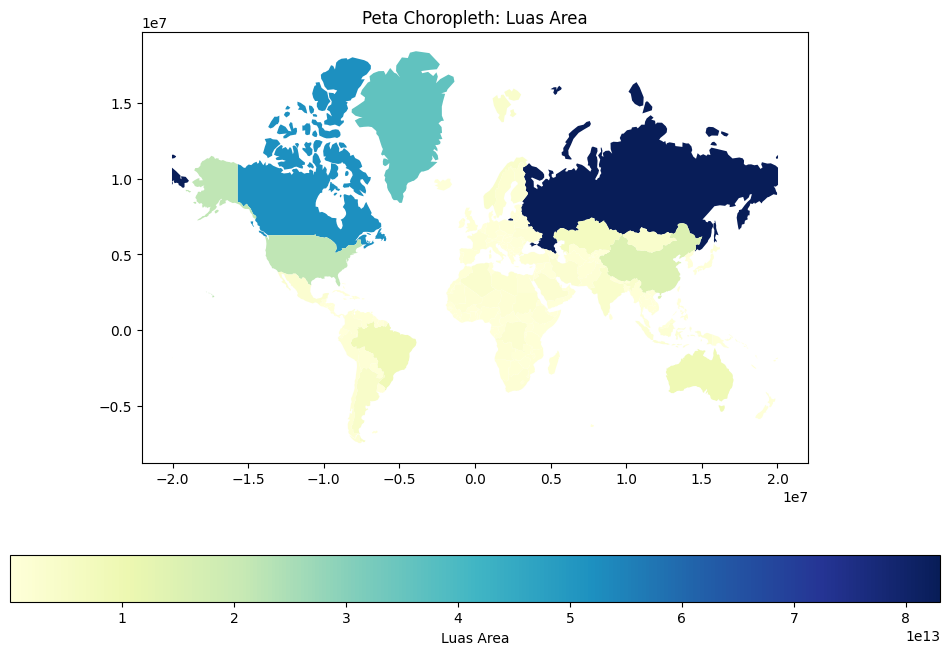

In [36]:
# Membuat peta choropleth berdasarkan kolom 'area'
ax = gdf.plot(column='area', cmap='YlGnBu', legend=True, 
              legend_kwds={'label': "Luas Area",
                           'orientation': "horizontal"}, 
              figsize=(12, 8))

plt.title("Peta Choropleth: Luas Area")
plt.show()

### Menambahkan Skala Warna dan Legenda

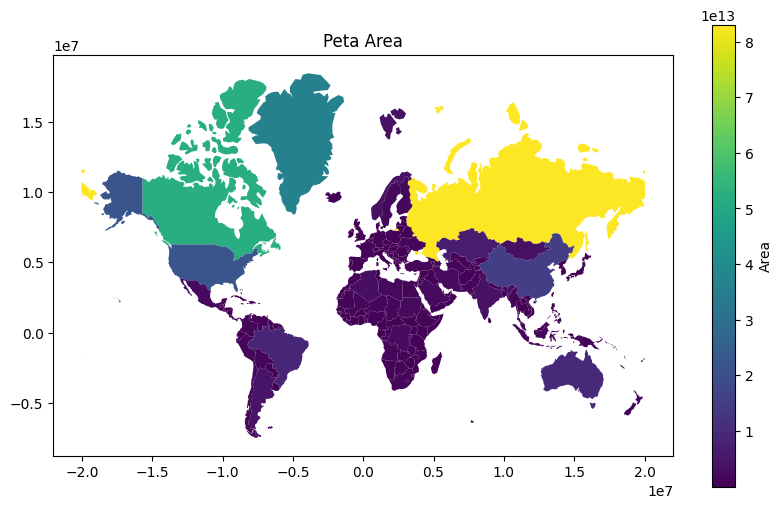

In [37]:
# Membuat peta dengan legenda yang disesuaikan
ax = gdf.plot(column='area', cmap='viridis', legend=True, figsize=(10, 6),
              legend_kwds={'label': "Area",
                           'orientation': "vertical"})

plt.title("Peta Area")
plt.show()

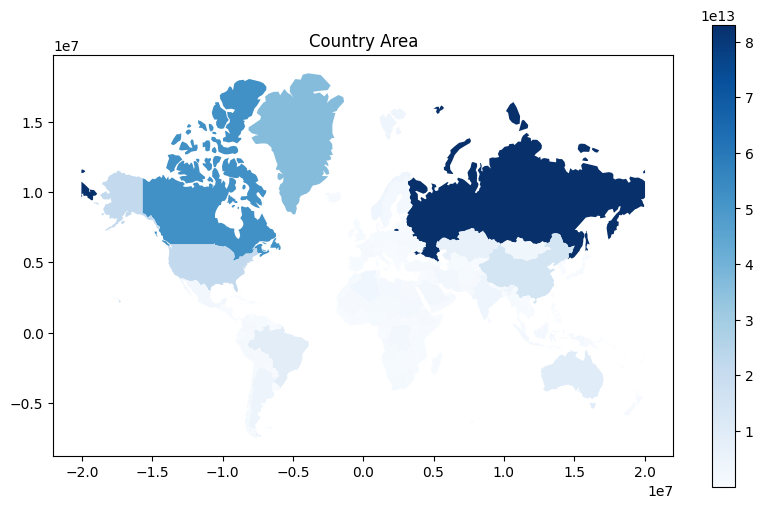

In [40]:
# Membuat peta
ax = gdf.plot(column='area', cmap='Blues', legend=True, figsize=(10, 6))
plt.title("Country Area")

# Menyimpan peta ke file PNG
plt.savefig("./output/country_area.png", dpi=300)
plt.show()